In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlbeats # python file that include usful functions
from biosppy.signals import ecg
import tensorflow as tf
import keras

In [2]:
#import dataset and annotations into a pandas dataframe
df = pd.read_csv("mitbih_database/101.csv")
annotations = mlbeats.df_from_txt("mitbih_database/101annotations.txt")

#preview of how the dataframe looks
annotations.head()

,Time,Sample#,Result
0,0:00.019,7,+
1,0:00.231,83,N
2,0:01.100,396,N
3,0:01.975,711,N
4,0:02.867,1032,N


(0.0, 1000.0)

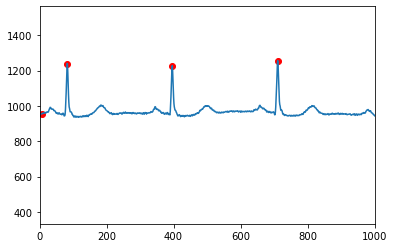

In [6]:
#preview of how the plot looks
plt.plot(df["\'sample #\'"], df["\'MLII\'"])

rpeak = []#the list that store the location of peaks
for i in range(len(annotations['Sample#'])):
    x = int(annotations['Sample#'][i])
    plt.scatter(x, df["\'MLII\'"][x], color = 'red')
    rpeak.append(x)
#plt.xlim(320000, 330000)
plt.xlim(0, 1000)

In [4]:
#data normalization
mx = np.amax(df["\'MLII\'"])
mn = np.amin(df["\'MLII\'"])

normalized_data = (df["\'MLII\'"] - mn)/(mx - mn)

#data denoising

denoised_data = mlbeats.denoising(normalized_data)


ValueError: Unexpected detail coefficient type: <class 'int'>. Detail coefficients must be arrays as returned by wavedec. If you are using pywt.array_to_coeffs or pywt.unravel_coeffs, please specify output_format='wavedec'

In [ ]:
#ts, filtered, rpeaks, beats_ts, beats, heart_rate_ts, heart_rate = ecg.ecg(signal=denoised_data, sampling_rate=360, show=False)
#ts1, filtered1, rpeaks1, beats_ts1, beats1, heart_rate_ts1, heart_rate1 = ecg.ecg(signal=normalized_data, sampling_rate=360, show=False)

beats, rpeak = ecg.extract_heartbeats(signal=denoised_data, rpeaks=rpeak, sampling_rate=360, before=0.4, after=0.5)
beats1, rpeak1 = ecg.extract_heartbeats(signal=normalized_data, rpeaks=rpeak, sampling_rate=360, before=0.4, after=0.5)

In [ ]:
plt.figure(figsize = [10, 10])
x=345
xaxis = np.arange(0, len(beats[x]), 1)
y = beats[x]
my_y = beats1[x]
plt.plot(xaxis, my_y, label = "raw")
plt.plot(xaxis, y, label = "denoised")
plt.grid()
plt.legend()
plt.show() 

In [ ]:
plt.figure(figsize = [10, 10])
for x in range(len(beats)):
    xaxis = np.arange(0, len(beats[x]), 1)
    #y = beats[x]
    my_y = beats[x]
    #plt.plot(xaxis, y)
    plt.plot(xaxis, my_y)
plt.grid()
plt.show() 

In [ ]:
print(beats)

In [ ]:
#make beat_annotation data frame
beat_annotation = pd.DataFrame(beats)
label = annotations['Result'].iloc[1:]
beat_annotation.insert(0, "Annotation", label)

In [ ]:
beat_annotation.head()